In [107]:
# Лабораторная работа №2
# Кластеризация методом k-средних (k-means)
# Данные взяты из файла Econom_Cities_data

In [108]:
#  Активируем библиотеки
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
#  Будем использовать процедуру KMeans из библиотеки sklearn
from sklearn.cluster import KMeans

matplotlib.style.use('ggplot')
%matplotlib inline

import os

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [109]:
#  Задаем рабочую папку
os.chdir("/content/drive/MyDrive/ITMO/data analysis/lab_2")

In [110]:
#  Указываем колонку City как index_col
df = pd.read_csv('/content/drive/MyDrive/ITMO/data analysis/lab_1/Econom_Cities_data.csv', sep = ';', decimal=',',  index_col='City')

In [111]:
# Удалим выбросы

In [112]:
print(df[df.index=='Cairo'])
print(df[df.index=='Jakarta'])

df = df.drop('Jakarta');
df = df.drop('Cairo');

       Work  Price  Salary
City                      
Cairo -9999   37.1 -9999.0
         Work  Price  Salary
City                        
Jakarta -9999   43.6 -9999.0


In [113]:
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9
Copenhagen,1717,91.3,62.9


In [114]:
# Данные находятся в разных диапазонах. Нужна нормализация
# z = (x - mean) / std - формула нормализации

In [115]:
stand_1 = preprocessing.StandardScaler() # Создаем объект scaler
stand_1.fit(df) # Изучаем данные (вычисляем среднее и std)
X = stand_1.transform(df)  # Применяем преобразование
X = pd.DataFrame(X, index=df.index, columns=df.columns)

In [116]:
# Производим кластеризацию
# Данных не так много, сильно бить на кластеры не стоит

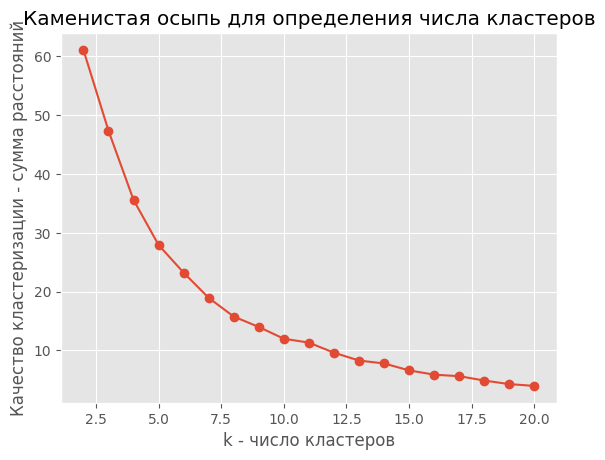

In [117]:
# Выбираем число кластеров. От 2 до 20
K = range(2, 21)

# Строим 20 моделей с разным числом кластеров. Качество кластеризации содержится в model.inertia_
dist = [KMeans(n_clusters=k, random_state=42, n_init=10, verbose=0).fit(X).inertia_ for k in K]

# Строим график каменистая осыпь
plt.plot(K, dist, marker='o')

# Добавляем на график текст
plt.xlabel('k - число кластеров')
plt.ylabel('Качество кластеризации - сумма расстояний')
plt.title('Каменистая осыпь для определения числа кластеров')
plt.show()

In [118]:
# между 2 и 3 виден сильный прирост качества кластеризации
# между 3 и 4 аналогично, между 4 и 5 менее резкое изменение, но оно значимое
# далее уже идёт излишнее разбиение

In [119]:
# остановимся на 5 кластерах
# строим модель

model = KMeans(n_clusters=5, random_state=42, max_iter=300, n_init=10, verbose=0)
model.fit(X)
df['cluster'] = model.labels_
df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
0,2146.875000,48.762500,12.412500
1,1990.833333,77.233333,55.316667
2,1732.000000,78.135714,53.614286
3,1868.750000,52.158333,17.458333
4,1780.500000,108.550000,71.300000


In [120]:
# Видно, что в кластере 0 собрались самые плохо оплачиваемые города - часов много при низких зарплатах.
# В кластере 1 - в меру работают и в меру получают.
# В кластере 2 - при меньшем количестве часов наблюдаются хорошие зарплаты.
# В кластере 3 - низкие зарплаты при довольно большом количестве часов.
# При этом цены на продукты приличные, скорее всего, населению приходится трудно.
# В кластере 4 - города с высокими ценами на товары и услуги (Price),
# при этом есть баланс между часами и их оплатой (зарплаты самые высокие).

In [121]:
df['cluster'].sort_values()

,cluster
City,
Bombay,0
Bogota,0
Caracas,0
Hong_Kong,0
Manila,0
Kuala_Lumpur,0
Singpore,0
Panama,0
Los_Angeles,1
